In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew, boxcox

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics

import re

#Warning 
import warnings
warnings.filterwarnings('ignore')


# Regression Model 

## Intro:

Linear regression models are supervised machine learning models which need labeled data. Supervised model which has two types, one is regression which is focused into numerical data and on the other hand, classification is related to categorical data.

Machine learning framework use 2 main ingredientes, first one is the algorithms which is referenced by models and second one is data. Thinking in machine learning, it's to believe how machine learns and take decisions based on data. First of all, we have to think how humans learn? by logic and by experience. So we can said that Linear regression models are supervised machine learning models which need labeled data. the supervised models has mainly two types, one is regression which is focused in continuous numerical data and on the other hand, classification is related to categorical data.

Machine learning framework use two main ingredients, first one is the algorithms which is referenced by models and second one is the data. Thinking in machine learning, it's asking our self how machine learns and take decisions based on data. First of all, we have to think about how humans learn: it's by logic and by experience. So we can said that machine uses experience to take decisions and this experience at the end is data.

Linear regression model in short words is a linear combination of features to estimate label or target variable. In this short review, we will use python coding and mpg dataset [mpg dataset]([https://archive.ics.uci.edu/static/public/9/auto+mpg.zip](https://archive.ics.uci.edu/static/public/9/auto+mpg.zip)).  The main idea is to predict the mpg(miles per gallon) fuel consumption from features like cylinders, horsepower, acceleration, mode, origin, etc.machine use experience because it's data at the end.


In [2]:
df = pd.read_csv('./dataset/df_new.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           381 non-null    float64
 1   cylinders     381 non-null    int64  
 2   displacement  381 non-null    float64
 3   horsepower    381 non-null    float64
 4   weight        381 non-null    float64
 5   acceleration  381 non-null    float64
 6   model         381 non-null    int64  
 7   origin        381 non-null    int64  
 8   car name      381 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 26.9+ KB


## Business Analysis

* Goal: 

The main idea is to predict the mpg(miles per galon) fuel consumption from a car model based on features like cylinders, horsepower, aceleration, mode, origin, etc.

* Dataset description:

- mpg: The "mpg" column represents the miles per gallon, indicating how many miles a vehicle can travel on one gallon of fuel. "mpg" is our target variable.
- cylinders: The "cylinders" column denotes the number of cylinders in the engine of the vehicle. It is a multi-valued discrete feature, indicating the count of cylinders, such as 3, 4, 5, 6, 8.
- displacement: The "displacement" column represents the total volume swept by all the cylinders in the engine. It is a continuous value and is typically measured in liters.
- horsepower: The "horsepower" column indicates the power output of the vehicle's engine. It is a continuous value, representing the strength of the engine.
- weight: The "weight" column represents the weight of the vehicle. It is a continuous value, often measured in pounds or kilograms.
- acceleration: The "acceleration" column denotes the time it takes for the vehicle to reach a certain speed. It is a continuous value, indicating the rate of change of velocity.
- model year: The "model year" column represents the year in which the vehicle was manufactured. It is a multi-valued discrete feature, indicating different years of production.
- origin: The "origin" column indicates the geographic origin or manufacturing region of the vehicle. It is a multi-valued discrete feature, representing different countries or regions.
- car model: The "car model" column specifies the unique name of each vehicle instance. It is a string feature, providing a distinct identifier for each car

# Point 1: How to define the model? Which model to use based on data?

First of all, we have to do some analysis on the data. Based on data, we can define the reason of what we want to estimate so the model depends what we want to do with data. Which value we want to estimate?. In our case, we want to estimate the value of "miles per galon" consumption of a car. 

Analysing the type of data of "mpg" label, we can see that this a numerical data which is float. So the output of our model has to be a number. In this way, we have to do a regression model in order to estimate or predict numbers. What kind of regression models? It depends on the purpose of label. For example, there are some examples here:

Regression types:
1. Linear Regression: It is an statistical regression method used for predictive analysis.
2. Logistic Regression: It is used for classification problems.
3. Polynomial Regression: It is used when data has non-linear behaviors.

and so on. Here a picture:

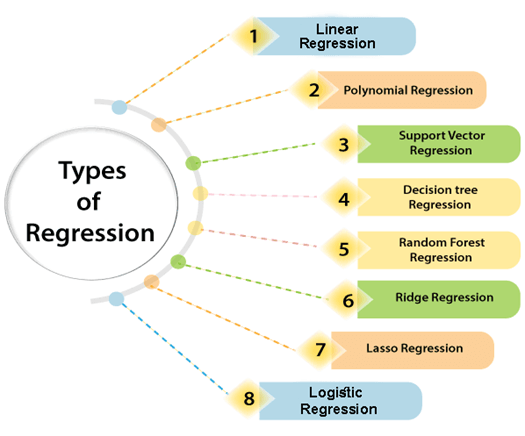

In our case in order to simplify,  we are going to use linear regression model. This model can be represented as a linear combination of features to represent a label, it means a linear equation: It is like a line with an slope and intercept(bias).

$$Y = a*x + b$$

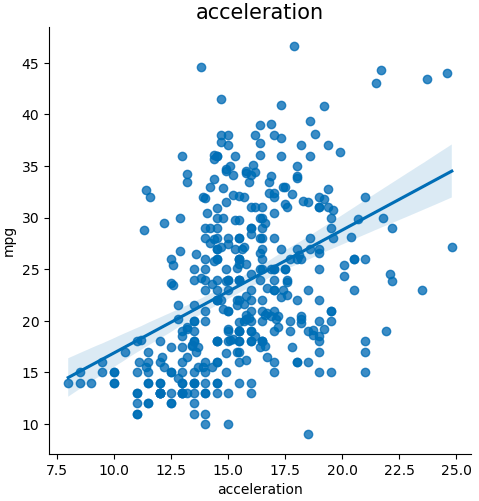

or 

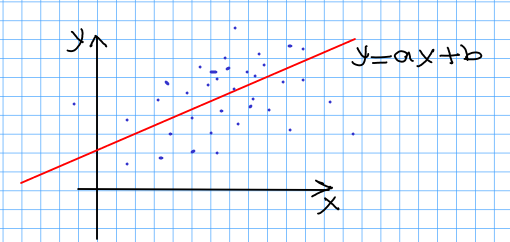

As much slope, the line is more steeped and if there is no slope, the default value would be the interception in y axis. What we want to fit a line to our data in the best way. In our case, we have more than one feature so we can consider a multivariate linear regression (hiperplane of n dimensions). So we can predict label $Y_{pred}$ based on features:

$$Y_{pred} = a_1*x_1 + a_2*x_2 + ... + a_n*X_n + b_0$$

Where:

- The $a_i$ are the weights or slopes. Slope is the measue of how steep is the data distributed on the line or plane.
- The $x_i$ are the features.
- The $b_0$ is the bias. Intercept(Bias) is like a default value of the label when there is no data.
- The $Y_{pred}$ is the prediction.

To dive into more details, we have to delve into mathematical operacions(linear algebra). We can express the formula of Linear Regression in a vector form we will have the following:


$$Y_{pred} = A.X^{T} + B$$

But now we have a problem because how to measure if our prediction is well or not. So we need to add an error variable which will help us to optimize our model.

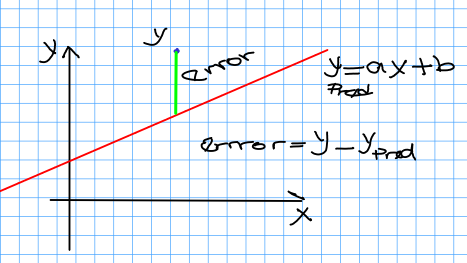

We have the values of features and labels in our data, but we don't know about weights, bias values so our question is how to get these values?. Is there any way or standard procedure to find them? because we can have many lines which could represent our model? In the next picture it can be showed.

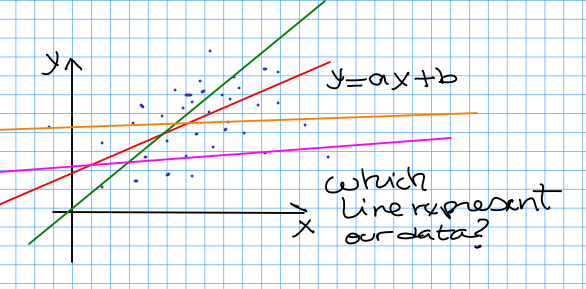

At the end when we think about weights, bias, it means our model, our mathematical representation of the data.


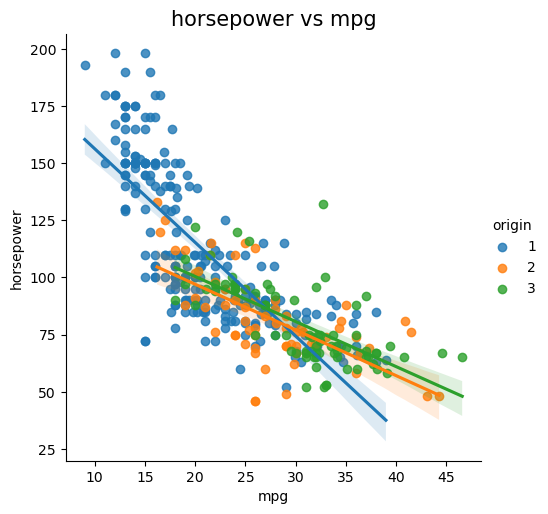

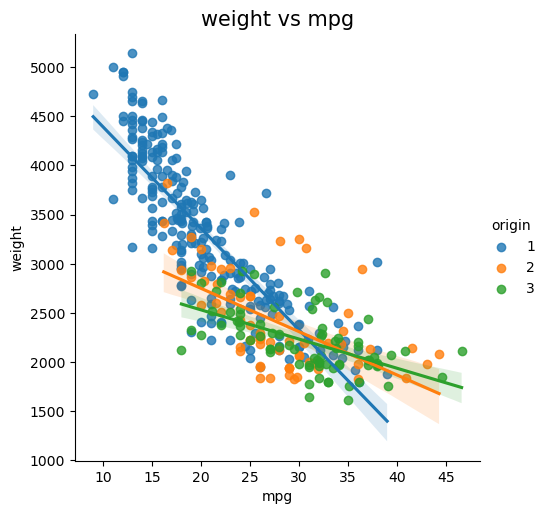

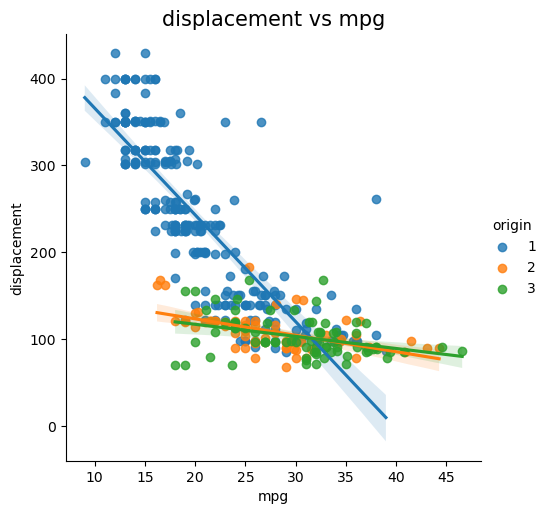

In [4]:
for i in ["horsepower","weight","displacement"]:
    #plot = sns.lmplot(x = i, y = "mpg", data = df)
    plot = sns.lmplot(x = "mpg", y = i, data = df, hue = 'origin')
    plt.title(i + ' vs ' + 'mpg', fontsize = 15)
    plt.show()

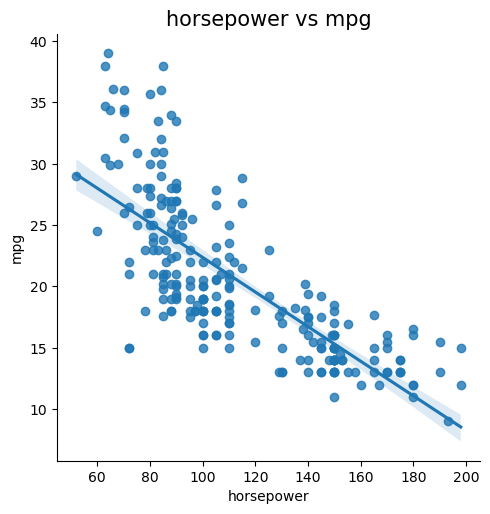

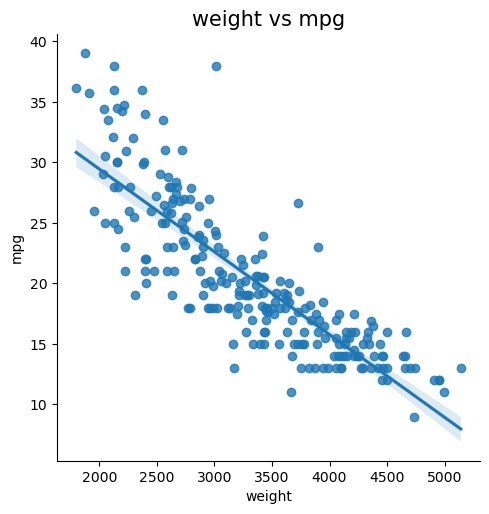

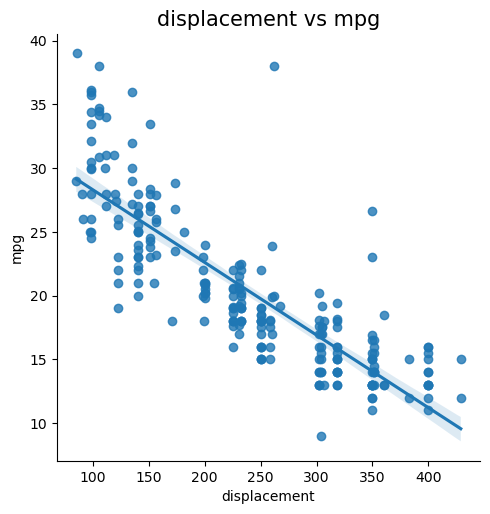

In [5]:
# Using origin 1 for all features:
for i in ["horsepower","weight","displacement"]:
    plot = sns.lmplot(x = i, y = "mpg", data = df.where(df['origin'] == 1))
    #plot = sns.lmplot(x = "mpg", y = i, data = df, hue = 'origin')
    plt.title(i + ' vs ' + 'mpg', fontsize = 15)
    plt.show()

# Point 2: How to define the weights? Which algorithm to use?

A linear regression is a line which we wants to fit in the best way to all points(data). In this way, we need to set up an algorithm or procedure to find the weigths and bias. There are many ways to set up this procedure, but in the book of Luis G. Serrano - Machine Learning, mention an intuitive way:

A basic algorithm:

- Input: a point from dataset 
- Output: a line which passes close to the points,  a model which best fit the data
- Procedure:
    1. pick a model with random weigth and bias(It means a randaom line)
    2. repeat many times: 
        - Pick some points as reference
        - Adjust the weigths and bias to improve predictions closer to this point
     3. return a model
    

Now we have to define how to adjust the weights(slope) and bias(intercept). There are many ways to do it. Having in mind one point (r,p) and a random line, here 2 ways to be closer to the point: 1. changing the slope by increasing(rotate counterclockwise) or decreasing(clockwise), 2. changing the intercept by increasing(upward) or decreasing(downward). Combining thses 2 ways, we can create a more complex algorithm:

Adjustment algorithm:

- Input: 
    - a line with weight m, bias b and equation: $y_{pred} = m*x + b$
    - a point (r,p)
    - a small positive value $ \eta $ (learning rate)
- Output: 
    - a line $y_{pred} = m^{'}*x + b^{'}$ which passes close to the point (r,p)
- Procedure:
    - Case 1 - $(y-y_{pred}) > 0 $:
        - $ m^{'} = m + \eta * r $ with this line will rotate counterclockwise
        - $ b^{'} = b + \eta * r $ with this line will traslate up
    - Case 2 - $(y-y_{pred}) < 0 $:
        - $ m^{'} = m - \eta * r $ with this line will rotate clockwise
        - $ b^{'} = b - \eta * r $ with this line will traslate down

Now you can see that we have to repeat this process for all the points and find best weights, bias, it means we have to iterate. Each iteration is called epoch.

Manual?
- Dataset created with small values
- Create algorithn for adjust weights
- Create algorithm for model and epoch
- Output weights

Package sklearn?
- Dataset created with small values
- Split dataset for training and testing
- model =  LinnearRegerssion(dataset_training)
- Output weights


There is another direct way to find the weights and bias. This way dives into mathematical operations(linear algebra) minimizing the loss function so we can express the first derivative of Loss function as the next equation:
$$\nabla Loss(a_i, b_0) = (Y^T - AX^T)X = 0$$
So weights are:
$$A = Y^TX(X^TX)^{-1}$$
Where:
- The $A$ are the vector of all the parameters weights and bias.

Adjustment algorithm(closed form):

- Input: 
    - a line with weight m, bias b and equation: $y_{pred} = a*x + b$
    - a point $(r,p)$
    - a small positive value $\eta$ (learning rate)
- Output: 
    - a line $y_{pred} = a^{'}*x + b^{'}$ which passes close to the point $(r,p)$
- Procedure:
    - Case 1 - $(y-y_{pred}) > 0$:
        - $a^{'} = a + \eta * r$ with this line will rotate counterclockwise
        - $b^{'} = b + \eta * r$ with this line will translate up
    - Case 2 - $(y-y_{pred}) < 0$:
        - $a^{'} = a - \eta * r$ with this line will rotate clockwise
        - $b^{'} = b - \eta * r$ with this line will translate down
        
        

In [723]:
df_line = df[df['origin'] == 1].reset_index(drop = True)
#df_line['horsepower'].values
df_line.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [724]:
df_line_train = df_line[0:int(235*0.8)]
df_line_test = df_line[int(235*0.8):-1]
df_line.shape, df_line_train.shape, df_line_test.shape

((236, 9), (188, 9), (47, 9))

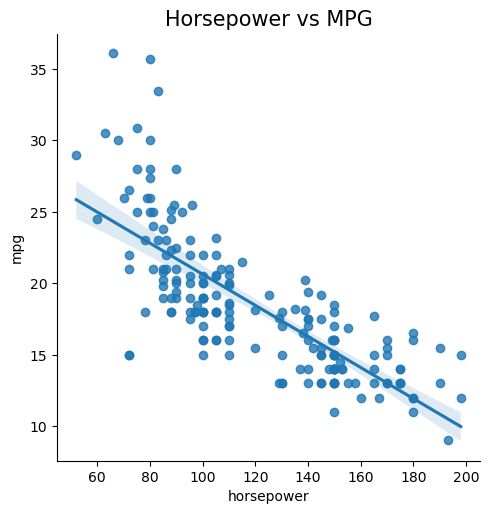

In [725]:
plot = sns.lmplot(x = 'horsepower', y = "mpg", data = df_line_train)
#plot = sns.lmplot(x = "mpg", y = i, data = df, hue = 'origin')
plt.title('Horsepower' + ' vs ' + 'MPG', fontsize = 15)
plt.show()

## Linear Regression Algorithm

In [726]:
def update_parameters(weight, bias, r, b, lr):
    label_pred = weight*r + bias
    if b > label_pred:
        weight = weight + lr*r
        bias = bias + lr
        #print(weight, bias, b, label_pred, b-label_pred)
    else:
        weight = weight - lr*r
        bias = bias - lr
        #print(weight, bias, b, label_pred, b-label_pred)
    return weight, bias

In [727]:
def update_parameters_gradient(weight, bias, r, b, lr):
    label_pred = weight*r + bias
    # Gradient descent
    weight = weight + lr*r*(b-label_pred)
    bias = bias + lr*(b-label_pred)
    return weight, bias

In [728]:
# First version
def basic_linear_model(df, lr=0.01, epochs = 100):
    weight = np.random.random()
    #bias = np.random.random()
    bias = np.random.randint(25,40)
    #print(weight, bias)
    model = []
    for epoch in range(epochs):
        i = np.random.randint(0, len(df['horsepower'])-1)
        #print(i)
        r = df['horsepower'][i]
        b = df['mpg'][i]
        #print(weight, bias, r, b, i)
        weight, bias = update_parameters(weight, bias, r, b, lr)
        model.append({'weight': weight, 'bias':bias, 'index':i})
    return model

In [729]:
# Second version
def gradient_linear_model(df, lr=0.01, epochs = 100):
    weight = np.random.random()
    #bias = np.random.random()
    bias = np.random.randint(25,40)
    #print(weight, bias)
    model = []
    for epoch in range(epochs):
        i = np.random.randint(0, len(df['horsepower'])-1)
        #print(i)
        r = df['horsepower'][i]
        b = df['mpg'][i]
        #print(weight, bias, r, b, i)
        weight, bias = update_parameters_gradient(weight, bias, r, b, lr)
        model.append({'weight': weight, 'bias':bias, 'index':i})
    return model

In [748]:
# Training basic Linear Model: 
model_lr = basic_linear_model(df_line_train, lr=0.001, epochs = len(df_line_train))

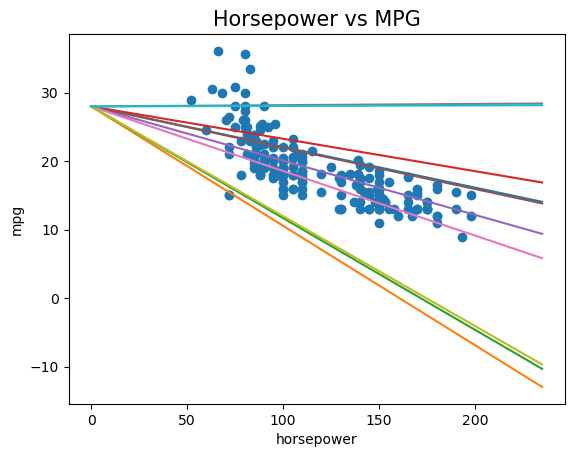

In [751]:
plt.scatter(df_line_train['horsepower'], df_line_train['mpg'])
x = [float(i) for i in range(236)]
#for w in range(0,len(model_lr)):
#for w in range(204,205):
for w in np.random.randint(0,len(df_line_train), 10):
    y_pred = [model_lr[w]['weight']*i + model_lr[w]['bias'] for i in x]
    plt.plot(x, y_pred)
plt.title('Horsepower' + ' vs ' + 'MPG', fontsize = 15)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

Here the weight is -0.09217094632073351 and the bias is 27.999 


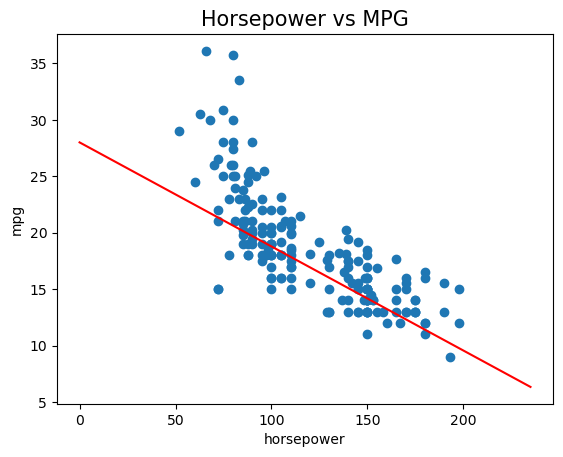

In [759]:
# Manuely revision: Here the best parameter which best fit data:
plt.scatter(df_line_train['horsepower'], df_line_train['mpg'])
x = [float(i) for i in range(236)]
#for w in range(0,len(model_lr)):
for w in range(180, 181):
#for w in np.random.randint(0,len(df_line_train), 6):
    y_pred = [model_lr[w]['weight']*i + model_lr[w]['bias'] for i in x]
    plt.plot(x, y_pred, color ='red')
plt.title('Horsepower' + ' vs ' + 'MPG', fontsize = 15)
plt.xlabel('horsepower')
plt.ylabel('mpg')
print('Here the weight is {} and the bias is {} '.format(model_lr[180]['weight'],model_lr[180]['bias']))
plt.show()

In [760]:
# Training Linear Model with Gradient Descent: 
model_sgd_lr = gradient_linear_model(df_line_train, lr=0.00001, epochs = len(df_line_train))

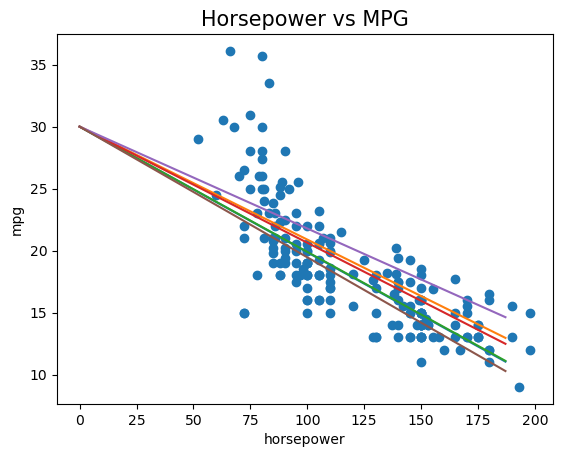

In [763]:
plt.scatter(df_line_train['horsepower'], df_line_train['mpg'])
x = [float(i) for i in range(len(model_sgd_lr))]
#for w in range(0,len(model_lr)):
#for w in range(102,103):
for w in np.random.randint(0,len(df_line_train), 6):
    y_pred = [model_sgd_lr[w]['weight']*i + model_sgd_lr[w]['bias'] for i in x]
    plt.plot(x, y_pred)
plt.title('Horsepower' + ' vs ' + 'MPG', fontsize = 15)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

# Point 3: How to measure/evaluate if our algorithm is the best? How to get the best weigths?

To measure we need to know the diference about real value and predicted value. So Error Function is used to measure our model. Error function is also called Loss Function or Cost Function. There is 2 ways to be defined: Absolute error and Square error. 

1. Absolute Error means to take the absolute value of the difference between the real value and the predicted value. it will help us to measure which line or model is more closer to all points. MAE. 
2. Square Error take the square of the difference between the real value and the predicted value. MSE.
3. Root Mean Square Error is used to have the same units as the problem variables have. So it give us a better understanding how much error has our predicted values to the real values.

Square Error is used more than Absolute Error because it has a better form to be used in formulas like derivation, intergrals.




## Measure Error during Epochs for basic linear model:

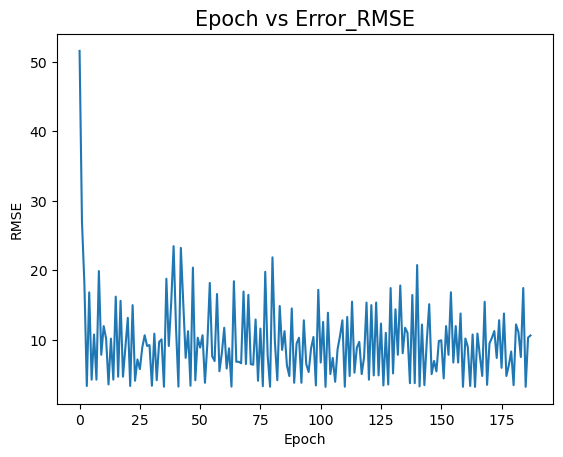

In [768]:
# Measure Error during Epochs for basic linear model:
error_MAE = []
error_RMSE = []
epochs = len(df_line_train)
epoch = [epoch for epoch in range(epochs)]
for w in range(len(model_lr)):
    weight = model_lr[w]['weight']
    bias = model_lr[w]['bias']

    x = df_line_train['horsepower']
    y = df_line_train['mpg']
    
    y_pred = weight*x + bias
    
    MAE = np.sum(np.abs(y - y_pred))/len(df_line_train['mpg'])
    RMSE = np.sqrt(np.sum((y - y_pred)**2)/len(df_line_train['mpg']))
    
    error_MAE.append(MAE)
    error_RMSE.append(RMSE)

plt.plot(epoch, error_RMSE)
plt.title('Epoch' + ' vs ' + 'Error_RMSE', fontsize = 15)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

In [771]:
# The RMSE for epoch 25:
print("The Root Square Error is: ", error_RMSE[25])

The Root Square Error is:  5.804905390805668


## Measure Error during Epochs for gradient descent linear model:

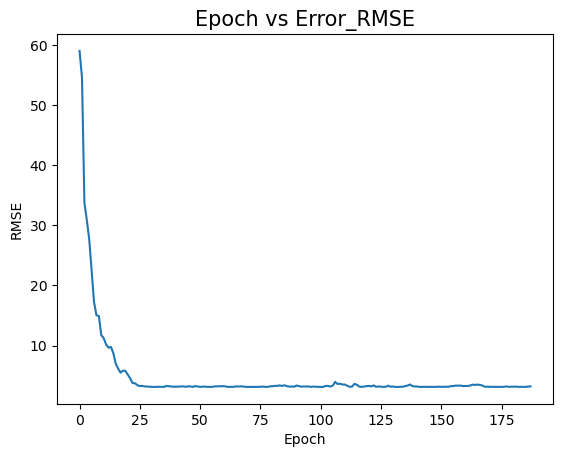

In [772]:
# Measure Error during Epochs for gradient descent linear model:
error_MAE_grad = []
error_RMSE_grad = []
epochs = len(df_line_train)
epoch = [epoch for epoch in range(epochs)]
for w in range(len(model_lr_grad)):
    weight = model_sgd_lr[w]['weight']
    bias = model_sgd_lr[w]['bias']

    x = df_line_train['horsepower']
    y = df_line_train['mpg']
    
    y_pred = weight*x + bias
    
    MAE = np.sum(np.abs(y - y_pred))/len(df_line_train['mpg'])
    RMSE = np.sqrt(np.sum((y - y_pred)**2)/len(df_line_train['mpg']))
    
    error_MAE_grad.append(MAE)
    error_RMSE_grad.append(RMSE)
#plt.plot(epoch, error_MAE)
plt.plot(epoch, error_RMSE_grad)
plt.title('Epoch' + ' vs ' + 'Error_RMSE', fontsize = 15)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

In [773]:
# The RMSE for epoch 25:
print("The Root Mean Square Error is: ", error_RMSE_grad[25])

The Root Mean Square Error is:  3.2740727202294027


In [774]:
model_sgd_lr[25]

{'weight': -0.0893854246765981, 'bias': 29.99562912791112, 'index': 54}

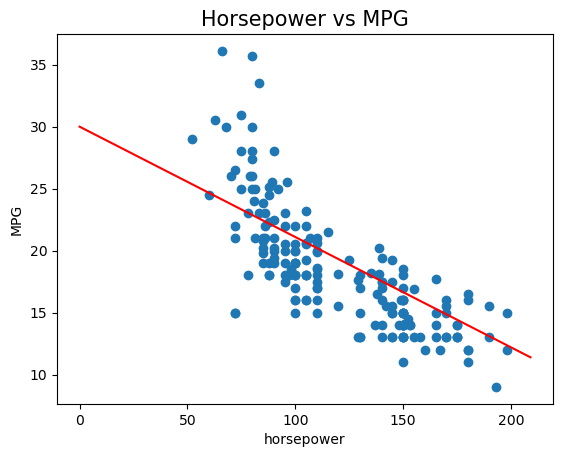

In [775]:
# Here the best parameter which best fit data:
plt.scatter(df_line_train['horsepower'], df_line_train['mpg'])
x = [float(i) for i in range(210)]
#for w in range(0,len(model_lr)):
for w in range(183, 184):
#for w in np.random.randint(0,len(df_line_train), 6):
    y_pred = [29.99 -0.089*i for i in x]
    plt.plot(x, y_pred, color = 'red')
plt.title('Horsepower' + ' vs ' + 'MPG', fontsize = 15)
plt.xlabel('horsepower')
plt.ylabel('MPG')
plt.show()

# Point 4: How to optimize the algorithm?

One way to optimize is to use Gradient Descent algorithm. This algorithm tries to minimize the error. This process does not always find the minimum value of  the function, but instead something very close it. How does gradient descent work?. 

Gradient descent works like to descent from the top of a mountain:
1. We have to look every side to find  a direction which we can descent the most. 
2. We have to take small steps which it can make sure descent the most. 
3. Repeat this process many times until be in the bottom.

One way to measure how the mode is going to go is the height of the error. So good models will ave small error and bad modes will have high errors. Measuring the error, we can realize that we do not need to execute many iteration (epoch). We can do some iteration and finally find the best model.

Gradient Descent has 3 versions: 
1. When evaluate 1 point: Stochastic Gradient Descent.
2. when evaluate mini-batch points: Mini-batch Gradient Descent
3. When use the whole dataset: Batch Gradient Descent

Parameters and Hyperparameters are important concepts in Machine Learning.  
1. Parameters are weights and bias. In general, they are any quantity that the model create or modify during the training process. 
2. Hyperparameters are learning rate, epochs, degree of polynomial regression model. In general, they are any quantity you set before the training process.




# References
- dataset source: https://archive.ics.uci.edu/static/public/9/auto+mpg.zip
- https://www.kaggle.com/code/merturper/vehicle-fuel-consumption-eda-stats-ml
- https://www.kaggle.com/code/filizesenkaya/car-eda